# GridSearchCV

### What is GridSearchCV?
- GridSearchCV exhaustively tries all possible combinations of hyperparameters from a defined grid and selects the one with the best performance score (usually accuracy, F1, etc.).
- GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

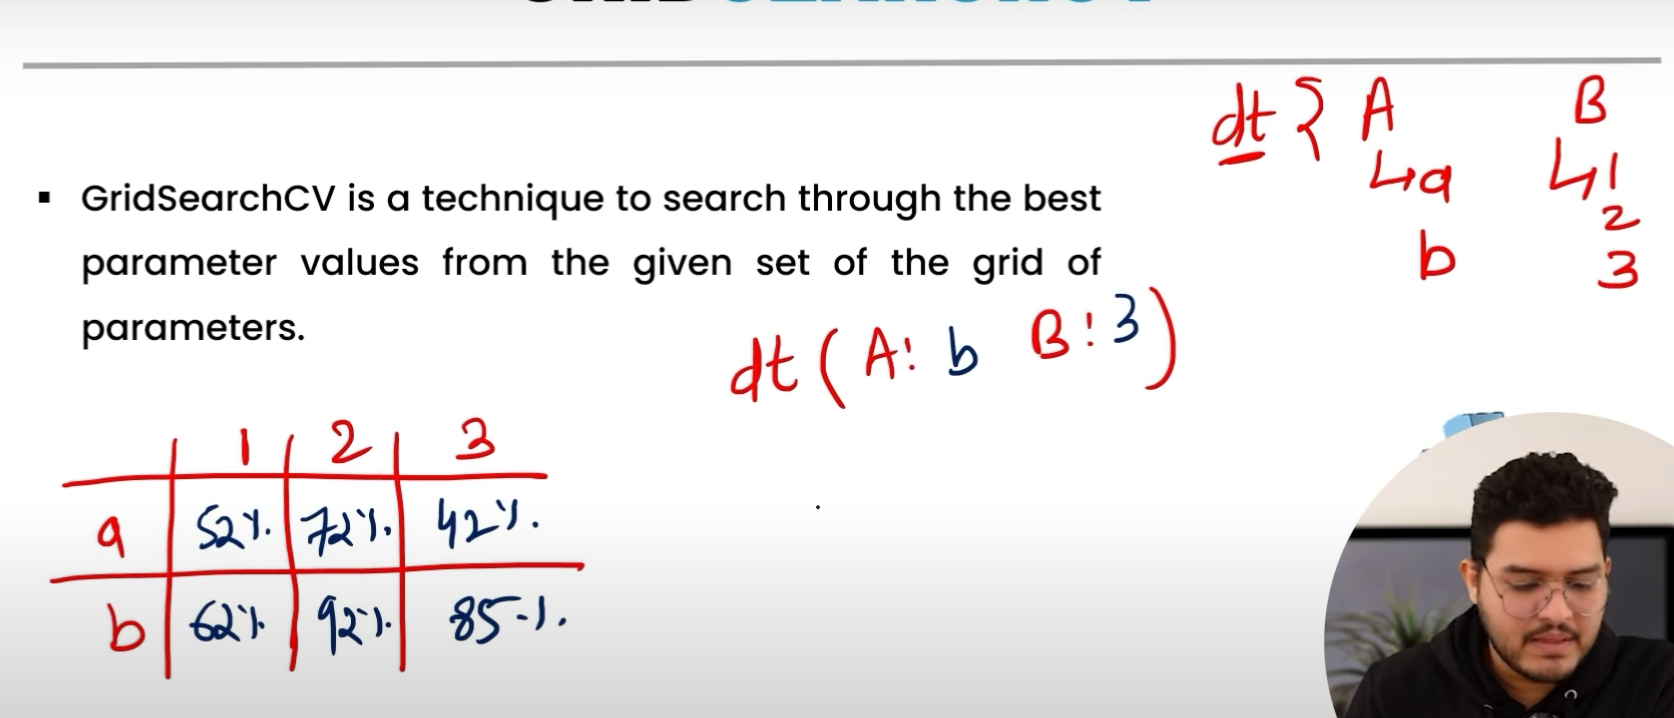
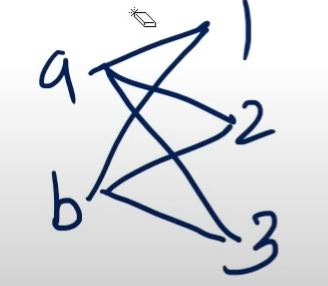
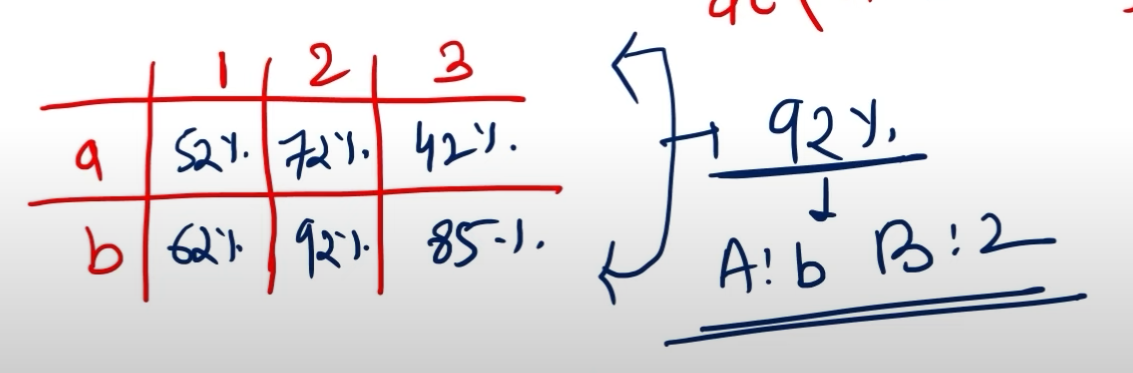

### How it works:
- You define a grid (dictionary) of hyperparameters to test.
- It trains the model on every possible combination.
- It uses cross-validation to evaluate each combination.
- It returns the best combination of hyperparameters.


#### Code Example: GridSearchCV [ChatGPT]

``` 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

model = RandomForestClassifier()

# Apply Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best result
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
```

#####  Pros & Cons of GridSearchCV

| ✅ Pros                     | ❌ Cons                        |
| -------------------------- | ----------------------------- |
| Finds **best** combination | Very **slow** for large grids |
| Easy to implement          | Computationally **expensive** |
| Uses **cross-validation**  | May **overfit** on validation |


# Example

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
ds_g = pd.read_csv('Polynomial Regression Data Set.csv')
ds_g.drop(columns=['Position'], inplace=True)
ds_g.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [ ]:
x = ds_g.drop(columns=['Salary'])
y = ds_g['Salary']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
model.score(X_test, y_test) *100

95.375

In [11]:
model.score(X_train, y_train) *100

100.0

In [ ]:
from sklearn.model_selection import GridSearchCV

In [17]:
# defining the parameters for to tune them in the form of disctionary or list of dictionaries
df = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(2, 20)],
}

In [19]:
gd = GridSearchCV(DecisionTreeRegressor(), param_grid= df)  # param_grid is the dictionary of the parameters which needed to be tuned and there is a cv parameter also here in the function which allows this to run multiple times line you can run the complete parameters as much times you want
gd.fit(X_train, y_train)

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [25]:
gd.best_params_ # to check the best parameters for the current model based on the data.

{'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}

In [26]:
print("Best Parameters:", gd.best_params_)
print("Best Score:", gd.best_score_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}
Best Score: nan


----

-----

# RandomizedSearchCV

### What is RandomizedSearchCV?
- RandomizedSearchCV tries random combinations of hyperparameters from specified ranges/distributions for a fixed number of iterations.
- It goes through only a fixed number of hyperparameter setting.
- It moves within the grid in a random fashion to find the best set of hyperparameters.

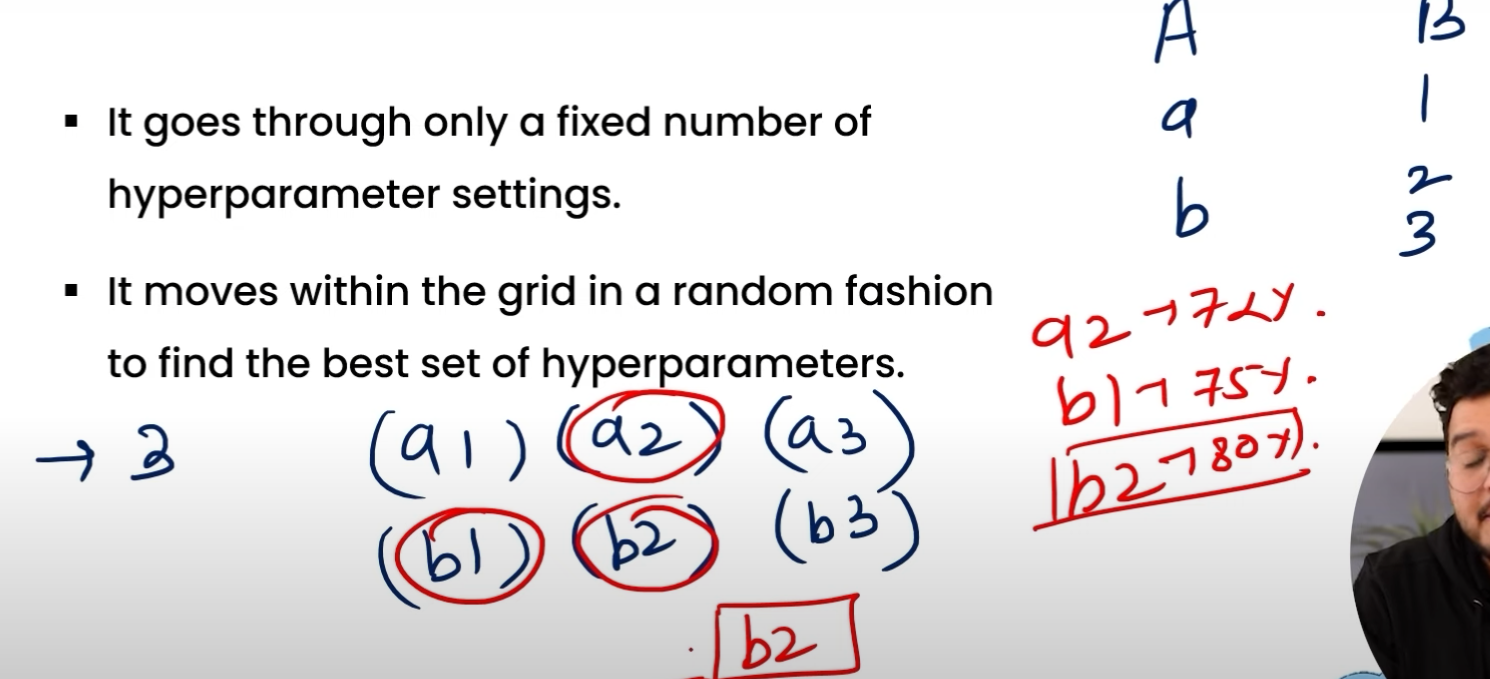

###  How it works:
- You define a range or distribution for each hyperparameter.
- It samples a random subset of combinations.
- It uses cross-validation to evaluate each.
- It returns the best combination found.

#### Code Example: RandomizedSearchCV [ChatGPT]

```
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define search space (distributions or ranges)
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'criterion': ['gini', 'entropy']
}

model = RandomForestClassifier()

# Apply Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best result
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
```

##### Pros & Cons of RandomizedSearchCV

| ✅ Pros                          | ❌ Cons                        |
| ------------------------------- | ----------------------------- |
| **Faster** than GridSearch      | Might **miss optimal** values |
| Works well with **large grids** | Results can vary slightly     |
| Can use **distributions**       | Less exhaustive               |

# Example

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [31]:
ds_r = pd.read_csv('Polynomial Regression Data Set.csv')
ds_r.drop(columns=['Position'], inplace=True)
ds_r.head()  

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [32]:
x1 = ds_r.drop(columns=['Salary'])
y1 = ds_r['Salary']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size= 0.2, random_state=42)

In [34]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
model.score(X_test, y_test) *100 

95.375

In [36]:
model.score(X_train, y_train) *100 

100.0

In [37]:
# defining the parameters for to tune them in the form of disctionary or list of dictionaries
df = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(2, 20)],
}

In [40]:
rs = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions= df, n_iter=10)  # param_grid is the dictionary of the parameters which needed to be tuned and there is a n_iter parameter which let us decide how many parameters we want to try at the place of running with all the parameters which take less time.
rs.fit(X_train, y_train)

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [41]:
print("Best Parameters:", rs.best_params_)
print("Best Score:", rs.best_score_)

Best Parameters: {'splitter': 'random', 'max_depth': 16, 'criterion': 'absolute_error'}
Best Score: nan


---

---

---

## How to Access Results  

```
# Best hyperparameter set
print(search.best_params_)

# Best CV score
print(search.best_score_)

# All results
pd.DataFrame(search.cv_results_)
```

## When to Use Which?

| Scenario                                | Best Option          |
| --------------------------------------- | -------------------- |
| Small model, small hyperparameter space | `GridSearchCV`       |
| Large hyperparameter space              | `RandomizedSearchCV` |
| Time-constrained tuning                 | `RandomizedSearchCV` |
| Need full exploration                   | `GridSearchCV`       |
